In [1]:
import pandas as pd
import numpy as np


In [3]:
df =pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [11]:
x = df.iloc[:, :1]
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [19]:
y = df.iloc[: ,-1:]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [7]:
from sklearn.model_selection import train_test_split

In [142]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.20,random_state=3)

In [144]:
from sklearn.linear_model import  LinearRegression

In [146]:
lr = LinearRegression()

In [148]:
lr.fit(x_train , y_train)

LinearRegression()

In [150]:
y_pred = lr.predict(x_test)

# Regression Metrics

In [153]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [155]:
print ("mean_absolute_error :" , mean_absolute_error(y_test,y_pred)) 

mean_absolute_error : 0.3111305364040811


In [157]:
print ("mean_squared_error :" , mean_squared_error(y_test,y_pred)) 

mean_squared_error : 0.14462823020493545


In [159]:
print ("root_mean_squared_error :" ,np.sqrt(mean_squared_error(y_test,y_pred))) 

root_mean_squared_error : 0.3803001843346062


In [161]:
print ("r2_score :" ,r2_score(y_test,y_pred))

r2=r2_score(y_test,y_pred)

r2_score : 0.6538089613784248


In [163]:
## adjusted R2 score

x_test.shape

(40, 2)

In [165]:
1- ((1-r2) * (40-1)/(40-1-1))

0.6446986708883833

In [167]:
# add new column which is not related to ouput , check what difference between r2 and adj r2

In [169]:
new_df1 =df.copy()

In [171]:
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]

In [173]:
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.591546,3.26
1,5.12,0.802198,1.98
2,7.82,0.916373,3.25
3,7.42,0.894020,3.67
4,6.94,0.485657,3.57


In [175]:
import matplotlib.pyplot as plt

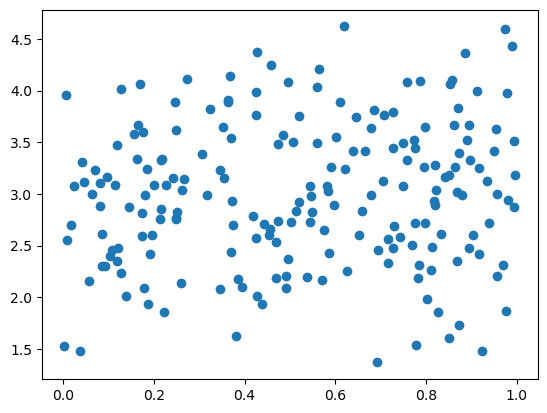

In [177]:
plt.scatter(new_df1['random_feature'],new_df1['package'])

In [179]:
x = new_df1.iloc[:,0:2]
x

,cgpa,random_feature
0,6.89,0.591546
1,5.12,0.802198
2,7.82,0.916373
3,7.42,0.894020
4,6.94,0.485657
...,...,...
195,6.93,0.107175
196,5.89,0.424128
197,7.21,0.620483
198,7.63,0.007126


In [181]:
y = new_df1.iloc[:,-1:]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [116]:
from sklearn.model_selection import train_test_split

In [183]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=3)

In [185]:
from sklearn.linear_model import LinearRegression

In [187]:
lr = LinearRegression() 

In [189]:
lr.fit(x_train , y_train )

LinearRegression()

In [191]:
y_pred = lr.predict(x_test)

In [193]:
from sklearn.metrics import r2_score

In [195]:
print("r2 :" ,r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2 : 0.654572936462045


In [197]:
x_test.shape

(40, 2)

In [199]:
1 - ((1-r2) * (40-1) / (40-1-2))

0.6359012032978312

In [203]:
# add one column which is related to output

In [205]:
new_df2 =df.copy()

In [211]:
new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [213]:
new_df2.sample(5)

,cgpa,iq,package
21,6.85,2.03,2.93
105,6.66,2.52,2.82
37,5.90,3.53,2.43
198,7.63,4.16,3.96
166,8.60,3.88,3.98


In [217]:
x=new_df2.iloc[:,0:2]
x

,cgpa,iq
0,6.89,3.96
1,5.12,1.78
2,7.82,3.45
3,7.42,3.77
4,6.94,2.47
...,...,...
195,6.93,3.26
196,5.89,3.37
197,7.21,4.24
198,7.63,4.16


In [221]:
y=new_df2.iloc[:,-1:]
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


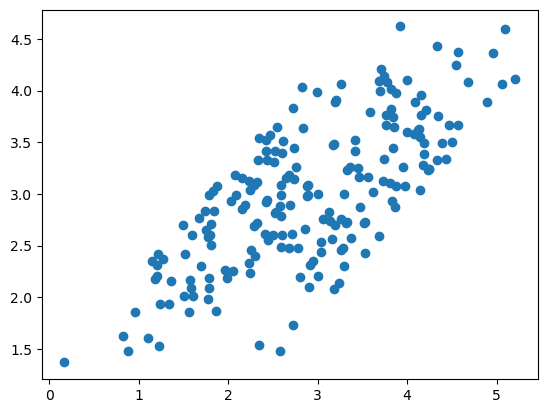

In [225]:
plt.scatter(new_df2['iq'],new_df2['package'])

In [227]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=3)

In [229]:
lr = LinearRegression() 

In [231]:
lr.fit(x_train , y_train )

LinearRegression()

In [233]:
y_pred = lr.predict(x_test)

In [235]:
print("r2 :" ,r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

r2 : 0.6961448368910164


In [237]:
x_test.shape

(40, 2)

In [239]:
1 - ((1-r2) * (40-1) / (40-1-2))

0.67972023347972